![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

### 2. Preparación de datos

A continuación con el equipo trabajaremos en el análisis de los datos y su transformaciones correspondientes para que estos sean aptos para el modelo y así logral el objetivo, el cual es la clasificación de un paciente como hospitalizado o no hospitalizado.

Caso:['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento presentó: (fiebre' or 'infección urinaria' or 'Sepsis')];

Control:['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento NO presentó: (fiebre' or 'infección urinaria' or 'Sepsis')]

Importamos las librerías que usaremos a lo largo del proyecto

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
#from imblearn.over_sampling import ADASYN

Cargamos el archivo con los datos y visualizamos los primeros '3' elementos para tener una idea general del dataframe

Cargamos la base de datos dada y procedemos a analizar la estructura de la misma obteniendo los primeros '3' elementos del dataframe previamente generado.

In [2]:
dataHosp = pd.read_excel('data/BBDD_Hospitalización.xlsx')
dataHosp.head(3)

c:\Users\germa\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0


Debido a que nuestro trabajo es: poder clasificar los campos que más influyen en la hospitalizacion de una persona,posteriormente de ser sometido a una biopsia prostatica, y predecir si el paciente será hospitalizado. Decidimos optar por eliminar las columnas ['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'] debido que no aportan información revelante a nuestro análisis y modelado, ya que los datos que necesitamos son previos a la hospitalización o variable objetivo.

In [3]:
dataHosp.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','AGENTE AISLADO'], inplace=True)

Verificamos si los campos tienen valores nulos y realizamos un análisis en base a los resultados.

In [4]:
for column in dataHosp.columns:
    print(f'{column} presenta: {dataHosp[column].isna().sum()} valores nulos')

EDAD presenta: 2 valores nulos
DIABETES presenta: 2 valores nulos
HOSPITALIZACIÓN ULTIMO MES presenta: 2 valores nulos
PSA presenta: 6 valores nulos
BIOPSIAS PREVIAS presenta: 4 valores nulos
VOLUMEN PROSTATICO presenta: 3 valores nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS presenta: 2 valores nulos
NUMERO DE MUESTRAS TOMADAS presenta: 2 valores nulos
CUP presenta: 3 valores nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA presenta: 4 valores nulos
BIOPSIA presenta: 2 valores nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA presenta: 2 valores nulos
FIEBRE presenta: 2 valores nulos
ITU presenta: 2 valores nulos
TIPO DE CULTIVO presenta: 2 valores nulos
PATRON DE RESISTENCIA presenta: 2 valores nulos
HOSPITALIZACION presenta: 5 valores nulos


Al visualizar pocos valores nulos en los distintos campos podemos pasar a revisar la distribución y, así, evaluar que métrica es óptima para la imputación de los mismos.

Graficaremos un histograma para visualizar más precisamente cada variable, si existen valores atipicos al no contar con un cliente directo, nuestro equipo de trabajo tomará el curso de acción que crea conveniente para cada caso.

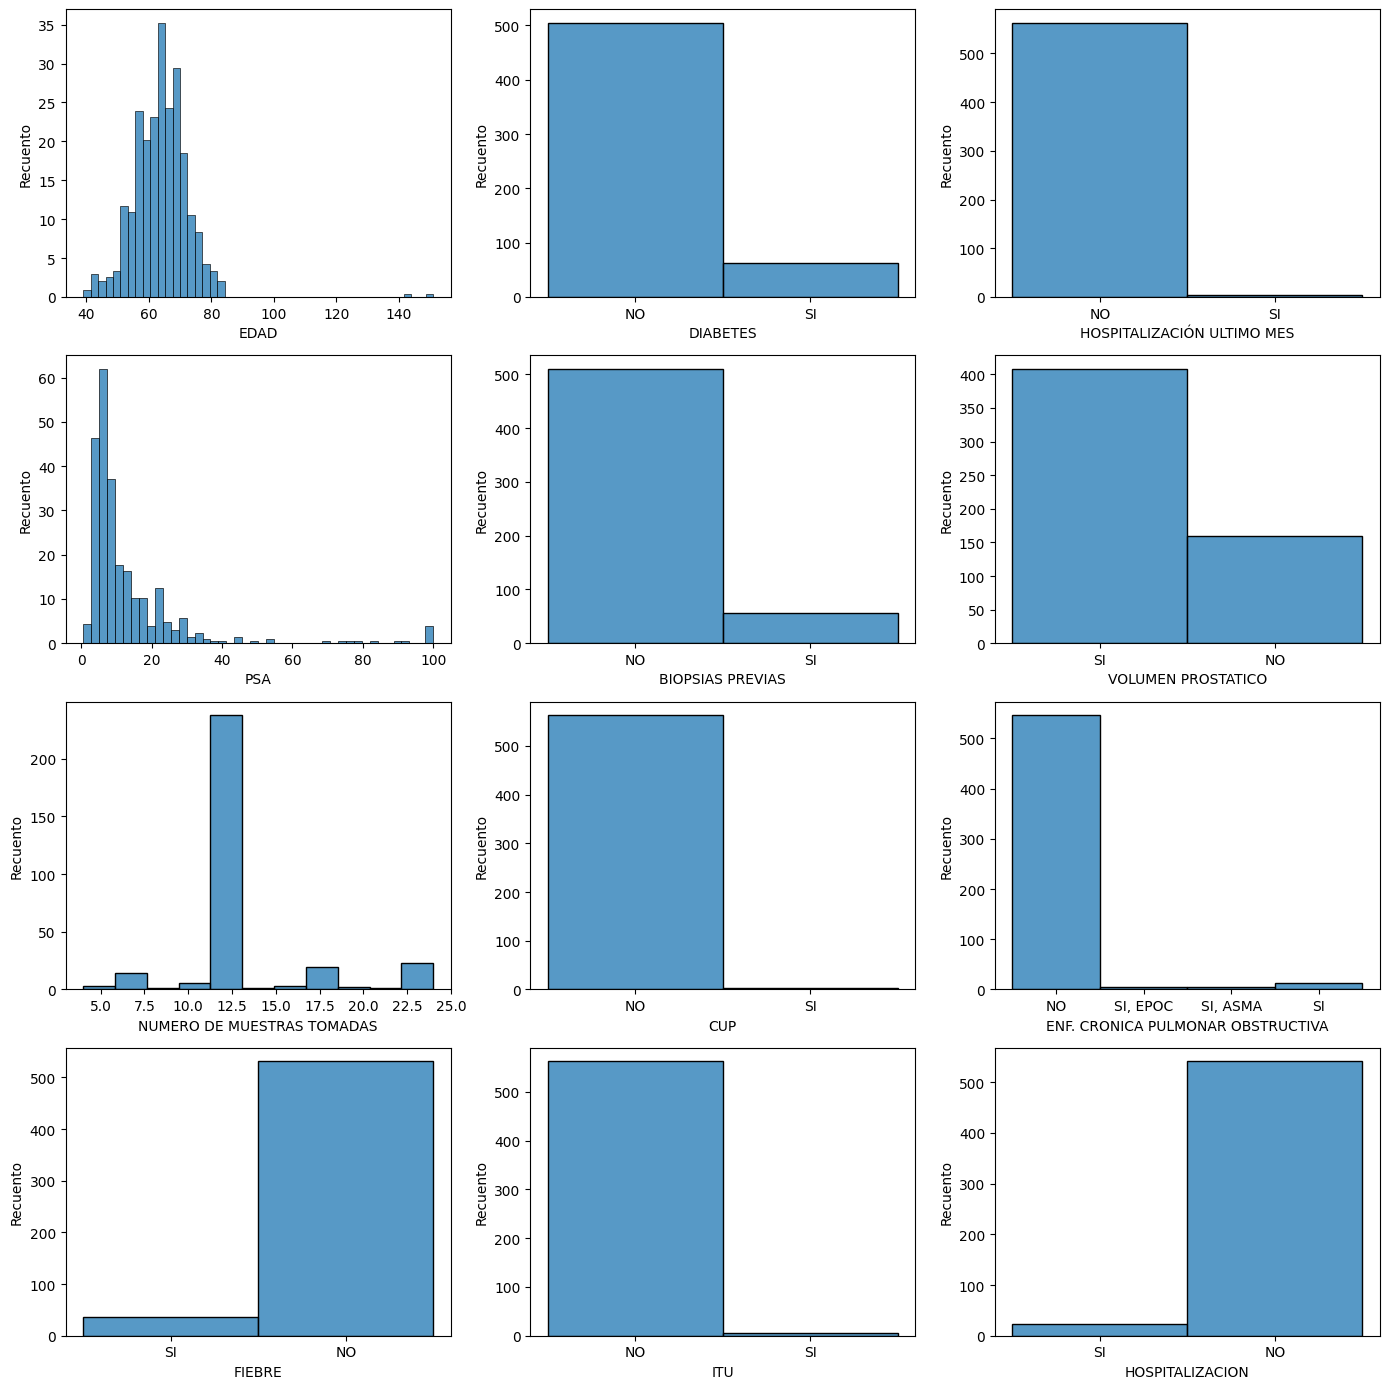

In [5]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO'],['NUMERO DE MUESTRAS TOMADAS','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA'],['FIEBRE','ITU','HOSPITALIZACION']
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(dataHosp[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  

Al observar, la columna ['ENF. CRONICA PULMONAR OBSTRUCTIVA'] consideramos en función a los datos proporcionados, que el tipo de enfermedad pulmonar es irrelevante para el estudio. Por lo mismo, vamos a quedarnos con variables catégoricas ('SI', 'NO').

In [6]:
dataHosp.loc[(dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'SI') & (dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'NO')]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION
26,75.0,NO,NO,25.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
28,75.0,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
33,63.0,NO,NO,10.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO


In [7]:
dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'].str[0:2]
dataHosp.drop([568,569], inplace = True)

Con el campo EDAD:
Al tener una distribución normal podemos computar tanto los valores faltantes como los atípicos con la mediana de los valores menores a 100, ya que entendemos que una edad mayor a esta en la mayoría de los casos se debe a un error de carga.

In [8]:
mediana_edad = int(dataHosp['EDAD'].loc[dataHosp['EDAD'] < 100].mean())
dataHosp.loc[(dataHosp['EDAD'] > 100) | (dataHosp['EDAD'].isna()), 'EDAD'] = mediana_edad

PSA: Debido a que el recuento de valores mayores a 40 es bajo, creemos que los valores mayores a 85 son errores de carga así que lo imputaremos con la mediana de los datos, ya que esta métrica no se ve altamente afectada ante los valores átipicos que sesgan hacia la derecha nuestra muestra.

In [9]:
dataHosp.loc[(dataHosp['PSA'] == None) | (dataHosp['PSA'] > 85),'PSA'] = round(dataHosp['PSA'].median(), 2)

Habiendo normalizado los campos que creiamos convenientes de cara al análisis y teniendo en cuenta la poca cantidad de valores faltantes, decidimos eliminar las instancias que contenían nulos.

In [10]:
dataHosp.dropna(inplace = True, axis=0)


En la utilización de Machine Learning se requieren datos númericos incluso cuando se habla de variables categóricas, por lo tanto, procederemos a transformar estas en una codificación pertinente para el uso de lo modelos.
Las variables categoricas que contengan unicamente 'SI' y 'NO' las codificaremos a 1s y 0s.

In [11]:
categorical01 = ['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','CUP','ITU','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','HOSPITALIZACION']
for feature in categorical01:
    dataHosp[feature] = pd.Categorical(dataHosp[feature]).codes

Realizamos una matriz de correlación y teniendo en cuenta que tan alto o bajo sea el coheficiente Pearson nos quedaremos con los campos que ayuden a explicar nuestra variable objetivo.

In [12]:
dataHosp.dtypes

EDAD                                                                         float64
DIABETES                                                                        int8
HOSPITALIZACIÓN ULTIMO MES                                                      int8
PSA                                                                          float64
BIOPSIAS PREVIAS                                                                int8
VOLUMEN PROSTATICO                                                              int8
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                             int8
ENF. CRONICA PULMONAR OBSTRUCTIVA                                               int8
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [13]:
mapa = dataHosp.corr(numeric_only= True)
mapa.style.background_gradient(cmap='coolwarm')

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION
EDAD,1.000000,0.135945,-0.027071,0.286557,-0.086703,0.259013,-0.211632,0.134053,0.120998,0.004885,-0.003971,-0.052362
DIABETES,0.135945,1.000000,0.026111,0.021304,-0.059536,0.081345,-0.050063,-0.030372,-0.004653,-0.024710,0.017647,0.068334
HOSPITALIZACIÓN ULTIMO MES,-0.027071,0.026111,1.000000,-0.042270,-0.031184,-0.026284,0.034082,-0.008094,-0.017886,0.052398,-0.009932,0.075916
PSA,0.286557,0.021304,-0.042270,1.000000,-0.003467,0.091455,-0.150882,0.150425,0.020470,-0.012728,-0.024345,-0.061808
BIOPSIAS PREVIAS,-0.086703,-0.059536,-0.031184,-0.003467,1.000000,-0.068781,0.396243,-0.027866,0.005281,0.037260,-0.034191,-0.007008
VOLUMEN PROSTATICO,0.259013,0.081345,-0.026284,0.091455,-0.068781,1.000000,-0.111312,0.052575,0.049827,0.048215,0.064507,0.027419
NUMERO DE MUESTRAS TOMADAS,-0.211632,-0.050063,0.034082,-0.150882,0.396243,-0.111312,1.000000,-0.086567,-0.077870,0.067340,0.026733,0.085355
CUP,0.134053,-0.030372,-0.008094,0.150425,-0.027866,0.052575,-0.086567,1.000000,-0.015983,-0.022356,-0.008875,-0.017651
ENF. CRONICA PULMONAR OBSTRUCTIVA,0.120998,-0.004653,-0.017886,0.020470,0.005281,0.049827,-0.077870,-0.015983,1.000000,-0.049399,-0.019610,-0.039001
FIEBRE,0.004885,-0.024710,0.052398,-0.012728,0.037260,0.048215,0.067340,-0.022356,-0.049399,1.000000,0.396979,0.679420


Obviaremos aquellas correlaciones muy cercanas a 0 y nos quedaremos únicamente con aquellas mayores a 0.030

In [14]:
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES','PSA','VOLUMEN PROSTATICO','NUMERO DE MUESTRAS TOMADAS','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU', 'HOSPITALIZACION']
dataNorm = dataHosp[features]

In [15]:
dataNorm.to_csv('data/Hospitales_Normalizados.csv', index = False)

In [16]:
nuevos = dataNorm.loc[dataNorm['HOSPITALIZACION'] == 1]
sample = nuevos.sample(23)
df2 = pd.concat([dataNorm, sample])

In [17]:
for i in range(0, 13):
    sample_p = df2.loc[df2['HOSPITALIZACION'] == 1].sample(23)
    sample_n = df2.loc[df2['HOSPITALIZACION'] == 0].sample(1)
    df2 = pd.concat([df2, sample_p, sample_n])


In [18]:
df2['HOSPITALIZACION'].value_counts()

HOSPITALIZACION
0    547
1    345
Name: count, dtype: int64

In [19]:
X = df2.drop(columns="HOSPITALIZACION")
y = df2["HOSPITALIZACION"]

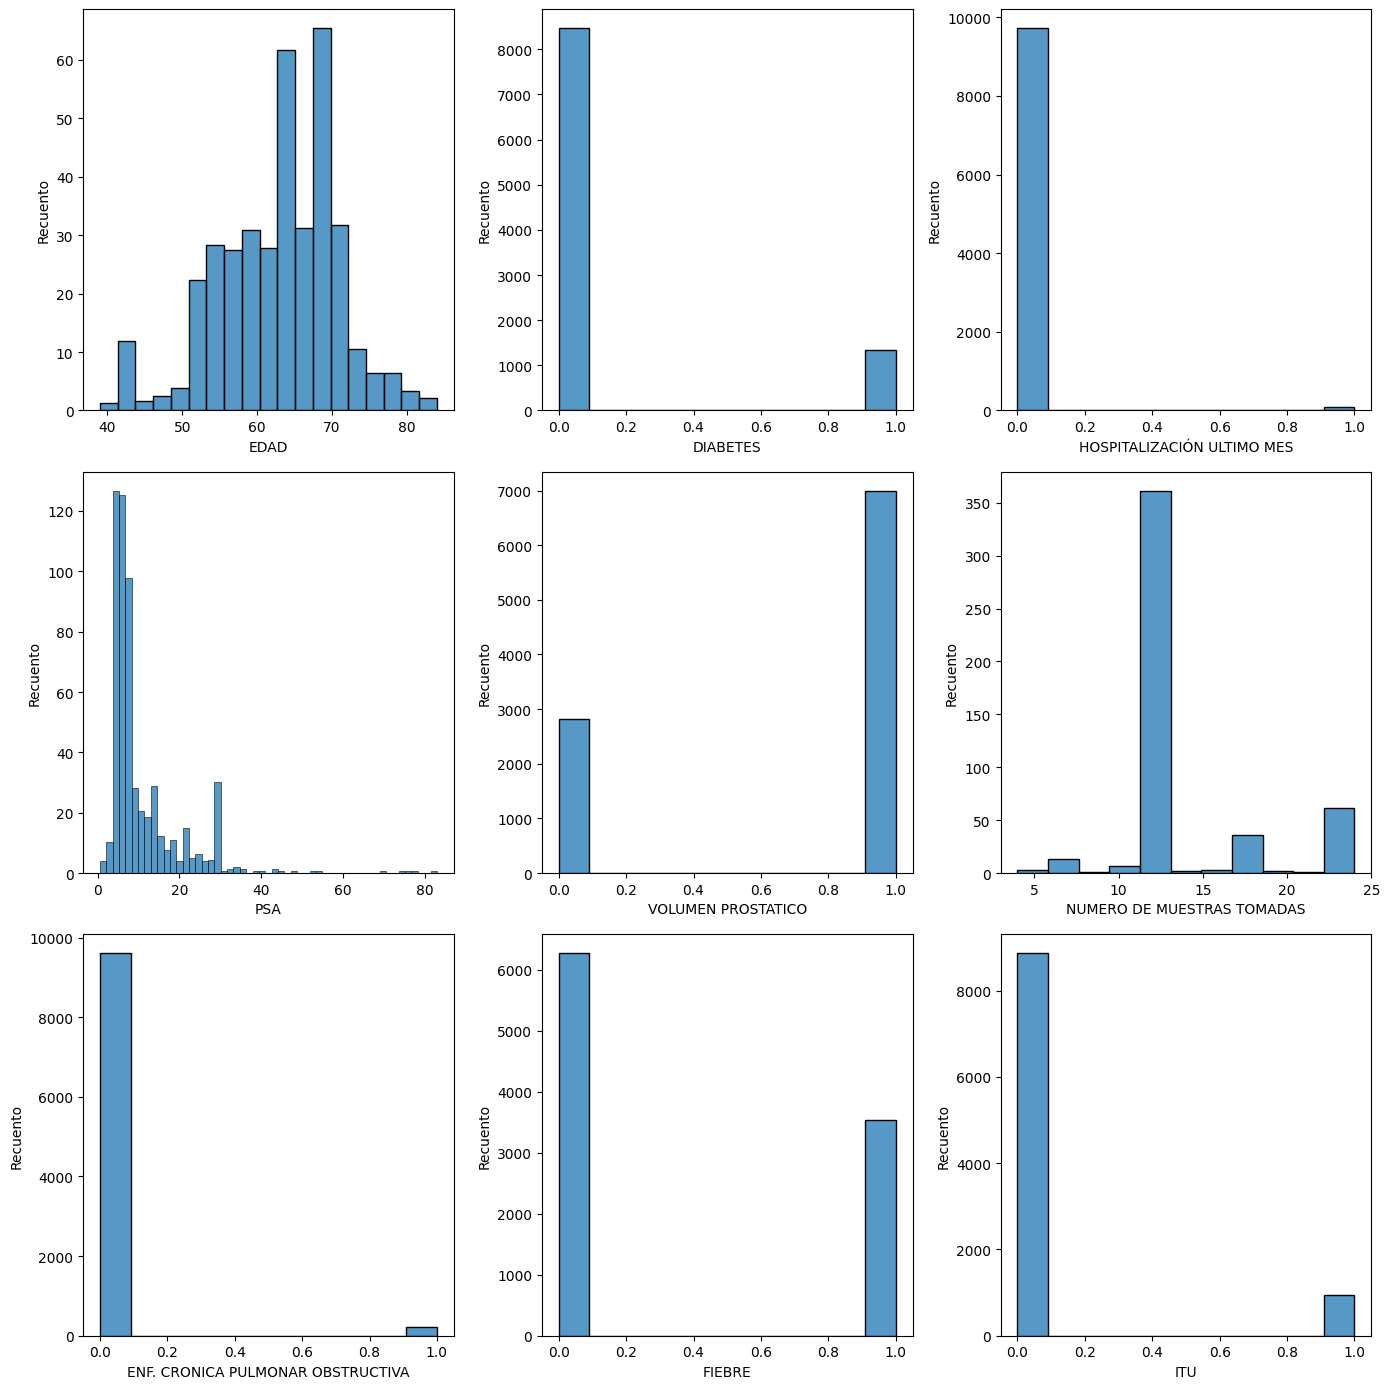

In [20]:

fig, axes = plt.subplots(3, 3, figsize=(14, 14))
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','VOLUMEN PROSTATICO','NUMERO DE MUESTRAS TOMADAS'],['ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU']
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(df2[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()

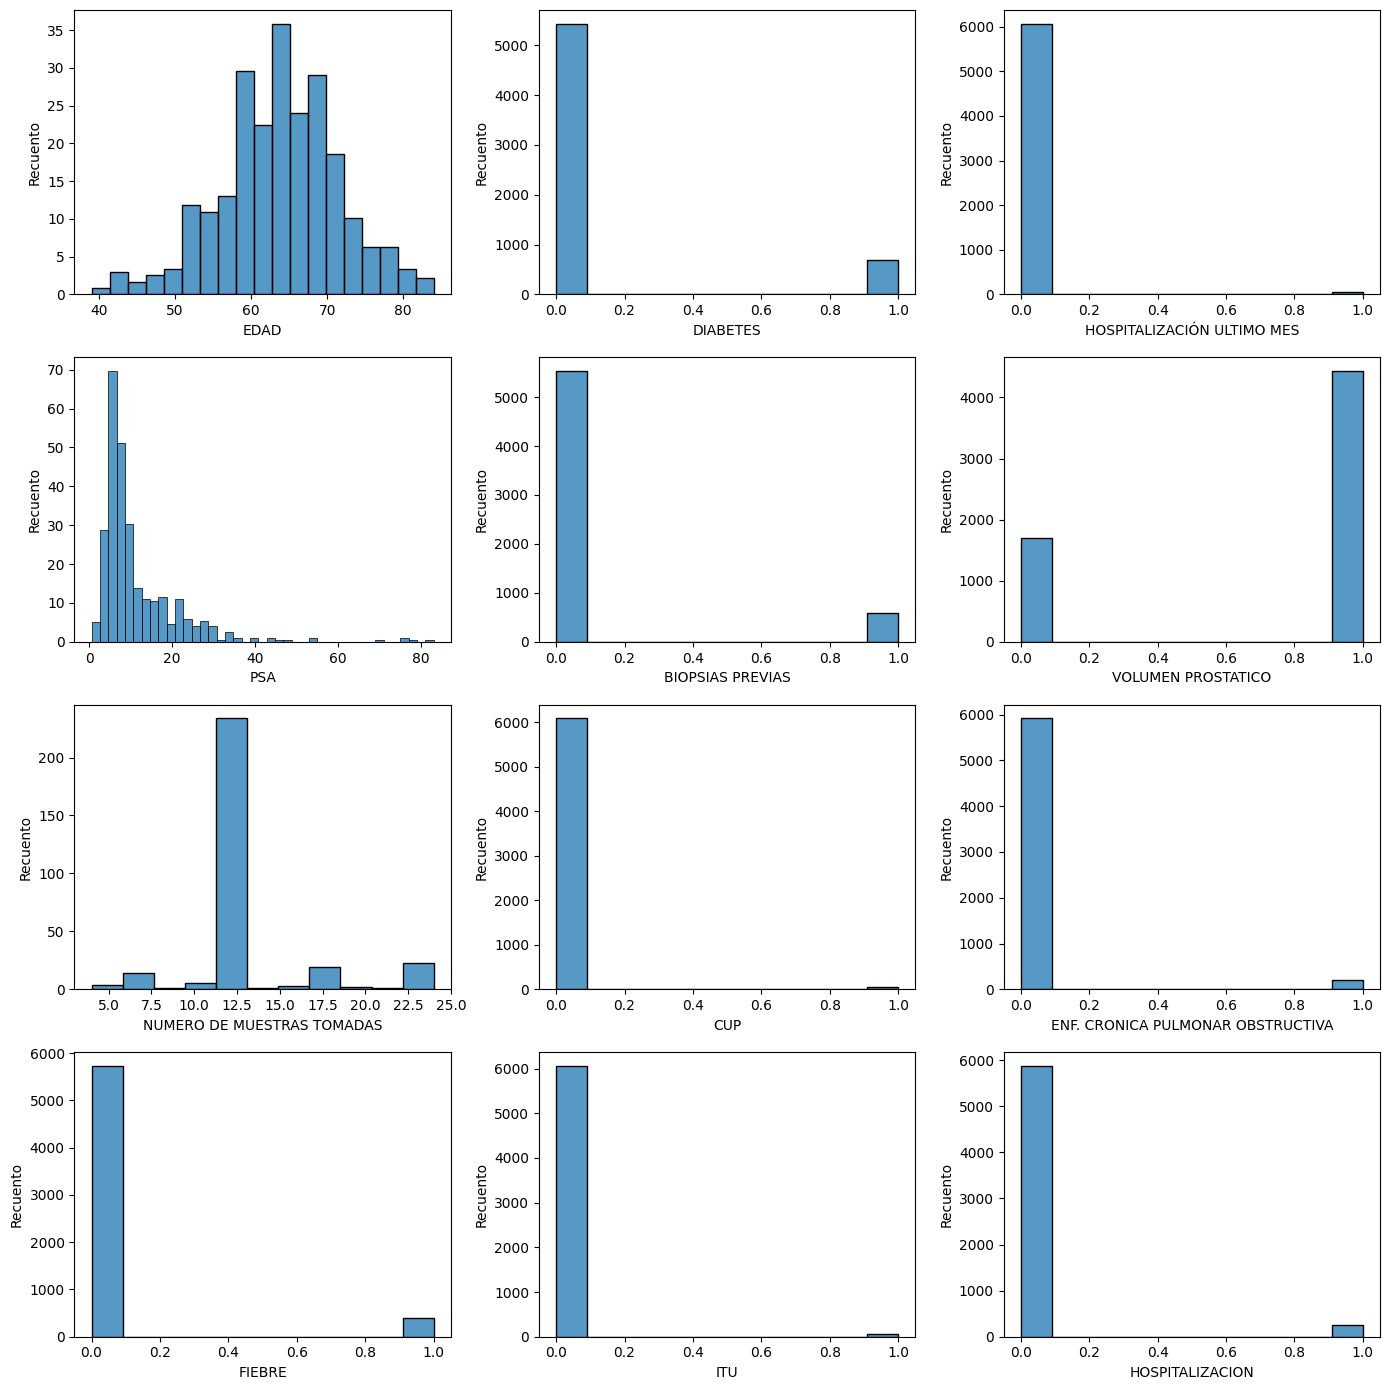

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO'],['NUMERO DE MUESTRAS TOMADAS','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA'],['FIEBRE','ITU','HOSPITALIZACION']
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(dataHosp[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  

In [22]:

mapa = df2.corr(numeric_only= True)
mapa.style.background_gradient(cmap='coolwarm')

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU,HOSPITALIZACION
EDAD,1.000000,0.155568,-0.047849,0.137346,0.171962,-0.159731,0.105901,0.036267,0.025793,-0.107812
DIABETES,0.155568,1.000000,0.100563,-0.009619,0.173199,0.216771,-0.013528,0.006519,0.102114,0.105944
HOSPITALIZACIÓN ULTIMO MES,-0.047849,0.100563,1.000000,-0.048730,0.007780,-0.005498,-0.014034,-0.046742,-0.031074,0.022118
PSA,0.137346,-0.009619,-0.048730,1.000000,0.164522,0.109628,0.031028,-0.063618,-0.040900,-0.125856
VOLUMEN PROSTATICO,0.171962,0.173199,0.007780,0.164522,1.000000,0.100556,0.042103,0.064049,0.207240,0.000068
NUMERO DE MUESTRAS TOMADAS,-0.159731,0.216771,-0.005498,0.109628,0.100556,1.000000,-0.079635,0.186159,0.040383,0.237527
ENF. CRONICA PULMONAR OBSTRUCTIVA,0.105901,-0.013528,-0.014034,0.031028,0.042103,-0.079635,1.000000,-0.110882,-0.048189,-0.117162
FIEBRE,0.036267,0.006519,-0.046742,-0.063618,0.064049,0.186159,-0.110882,1.000000,0.434601,0.864921
ITU,0.025793,0.102114,-0.031074,-0.040900,0.207240,0.040383,-0.048189,0.434601,1.000000,0.411307
HOSPITALIZACION,-0.107812,0.105944,0.022118,-0.125856,0.000068,0.237527,-0.117162,0.864921,0.411307,1.000000


In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df2.drop(['DIABETES','VOLUMEN PROSTATICO','ENF. CRONICA PULMONAR OBSTRUCTIVA', 'HOSPITALIZACION', 'ITU',
              'NUMERO DE MUESTRAS TOMADAS'], axis = 1)
y = df2['HOSPITALIZACION']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

clf.fit(X_train,y_train)

y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

#Para crear la matriz de confusión
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Para visualizar
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación
from sklearn.metrics import classification_report

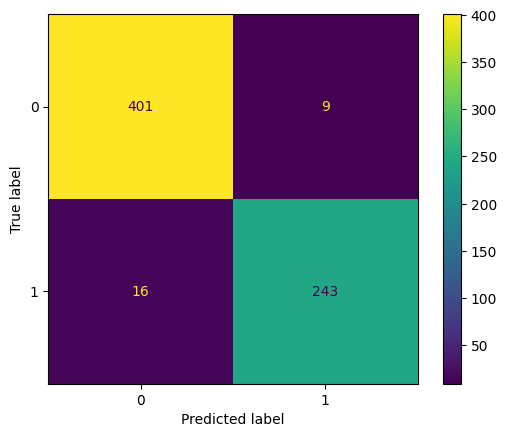

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.96      0.98      0.97       410
           1       0.96      0.94      0.95       259

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



In [24]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

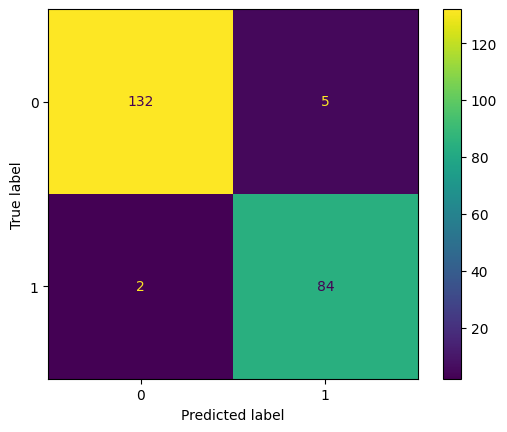

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.99      0.96      0.97       137
           1       0.94      0.98      0.96        86

    accuracy                           0.97       223
   macro avg       0.96      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223



In [25]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [26]:
feature_names = list(X.columns)
importances = clf.feature_importances_

# Imprime los nombres de los features junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

EDAD: 0.14245408510469515
HOSPITALIZACIÓN ULTIMO MES: 0.0
PSA: 0.01780854768406531
FIEBRE: 0.8397373672112395


In [27]:
from sklearn.metrics import accuracy_score

prueba = df2.sample(300)
test = prueba.drop(['DIABETES','VOLUMEN PROSTATICO','ENF. CRONICA PULMONAR OBSTRUCTIVA', 'HOSPITALIZACION', 'ITU',
              'NUMERO DE MUESTRAS TOMADAS'], axis = 1)
correcto = prueba['HOSPITALIZACION']

A = clf.predict(test)

exactitud = accuracy_score(correcto, A)
print(exactitud)

0.9766666666666667


In [28]:
from sklearn.neighbors import KNeighborsClassifier

#Instanciamos el modelo
clf = KNeighborsClassifier(n_neighbors=5)

#Entrenamos el modelo
clf.fit(X_train, y_train)

#Predecimos sobre nuestro set de entrenamieto

y_train_pred = clf.predict(X_train)

#Predecimos sobre nuestro set de testeo

y_test_pred = clf.predict(X_test)


from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)


from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

#para obtener el valor de precisión, recall, F1-score y soporte para cada clase en un problema de clasificación
from sklearn.metrics import classification_report

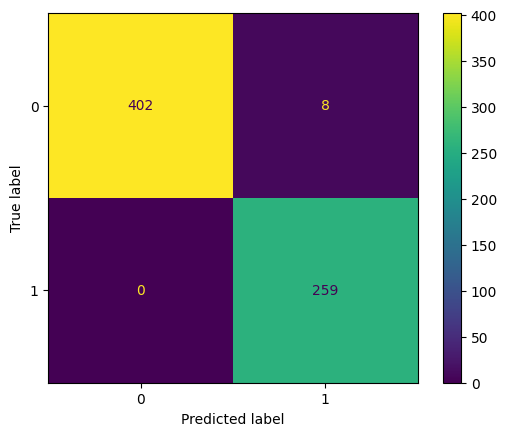

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      0.98      0.99       410
           1       0.97      1.00      0.98       259

    accuracy                           0.99       669
   macro avg       0.99      0.99      0.99       669
weighted avg       0.99      0.99      0.99       669



In [29]:
cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

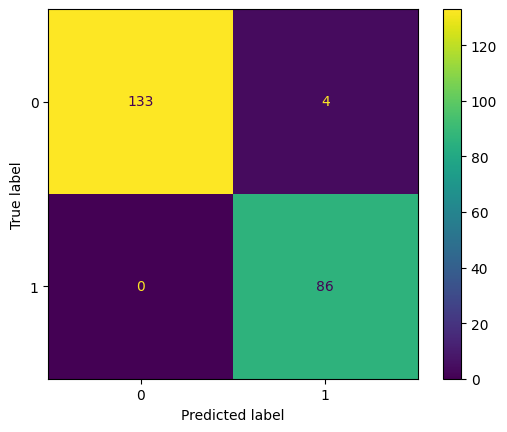

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       1.00      0.97      0.99       137
           1       0.96      1.00      0.98        86

    accuracy                           0.98       223
   macro avg       0.98      0.99      0.98       223
weighted avg       0.98      0.98      0.98       223



In [30]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [31]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9820627802690582


PRUEBA PARA LOS PIBARDOS

In [32]:
A = clf.predict(test)

exactitud = accuracy_score(correcto, A)
print(exactitud)

0.9933333333333333
